# **Introduction**

Spam or Ham | SMS Detector

Here we will first do Exploratory Data Analysis (EDA) and looking into various algorithms we will choose one algorithm to develop flask based spam detector.

The algorithms we are working with are:

- Bagging Classification
- Random Forest Classification
- Extra Tree Classification
- Naive Bayes classification
- Decision tree Classification
- KNeighbors Classification
- SVM Classification

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


In [ ]:
df = pd.read_csv('/content/spam.csv',encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.rename(columns={'v1': 'type', 'v2': 'text'}, inplace=True)
df.head()

,type,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
SF = df.loc[(df.type == 'spam')]
SF.describe()

,type,text
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


In [ ]:
df.describe()

,type,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df['length']=df['text'].apply(len)
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

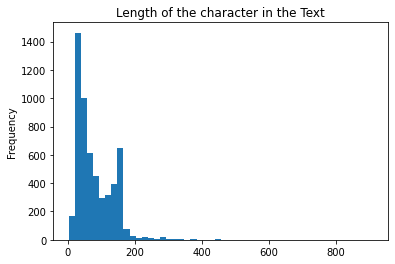

In [ ]:
df['length'].plot(bins=50,kind='hist').set_title("Length of the character in the Text")
plt.savefig('Length of the character in the Text.png')

In [ ]:
df[df['length']==910]['text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# **Test Preprocessing**

In [ ]:
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [ ]:
import nltk
nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
nopunc.split()

['sample', 'message']

In [ ]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
# Original 
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**Tokenization**: process of converting the normal text strings in to a list of tokens (words that we actually want).

In [ ]:
df.rename(columns={'is_spam': 'type', 'content': 'text'}, inplace=True)
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Printing lists of tokens (also known as lemmas) 
df['text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [ ]:
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## **Vectorization**

Need to convert each of those messages(lemmas) into a vector the SciKit Learn's algorithm models can work with using bag-of-words model.

STEP:

Count how many times does a word occur in each message (Known as term frequency) by CountVectorizer.

Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

Normalize the vectors to unit length, to abstract from the original text length (L2 norm) by TF-IDF, using scikit-learn's TfidfTransformer.

CountVectorizer : will convert a collection of text documents to a matrix of token counts in 2D matrix:

1-dimension is the entire vocabulary (1 row per word) other dimension are the actual documents, in this case a column per text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# here  we take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
print(len(bow_transformer.vocabulary_))

11304


In [ ]:
textat4=df['text'][3]
print(textat4)

U dun say so early hor... U c already then say...


In [ ]:
# pinting vector preseanttion of textat4
bow4=bow_transformer.transform([textat4])
print(bow4)
print(bow4.shape)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2
(1, 11304)


the above says that there are seven unique words in text number 4 (after removing common stop words). Two of them appear twice, the rest only once

In [ ]:
#Checking which appers twice
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

VALUED
shades


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Now using .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of text.

In [ ]:
text_bow = bow_transformer.transform(df['text'])

In [ ]:
print('Shape of Sparse Matrix: ',text_bow.shape)
print('Amount of non-zero occurences:',text_bow.nnz)

Shape of Sparse Matrix:  (5572, 11304)
Amount of non-zero occurences: 50193


In [ ]:
sparsity =(100.0 * text_bow.nnz/(text_bow.shape[0]*text_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


**Term weighting and normalization** can be done with TF-IDF,
TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining

used to evaluate how important a word is to a document in a collection
importance increases proportionally to the number of times a word appears
Two strps:

the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document;

the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF: Term Frequency, which measures how frequently a term occurs in a document.
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is.
While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance.

DF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)


  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [ ]:
print(bow_transformer.get_feature_names()[5945])
print(bow_transformer.get_feature_names()[3141])

different
Per


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# check what is the IDF (inverse document frequency) of the word 
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['different']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Free']])

7.227793514771165
5.775541185859478


To transform the entire bag-of-words corpus into TF-IDF corpus at once

In [ ]:
text_tfidf=tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(5572, 11304)


In [ ]:
df["text"][:10]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: text, dtype: object

Lets convert our clean text into a representation that a machine learning model can understand. I'll use the Tfifd for this

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(df["text"])
print(features.shape)

print(len(vec.vocabulary_))

(5572, 8402)
8402


There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline". I encourage you to check out SciKit Learn's documentation on dealing with text data as well as the expansive collection of available papers and books on the general topic of NLP.

# **Exploratory Data Analysis**

In [ ]:
df.head()


,type,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.rename(columns={'type': 'is_spam', 'text': 'content'}, inplace=True)
df.head()

,is_spam,content,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df["nwords"] = df["content"].apply(lambda s: len(re.findall(r"\w+", s)))
df["message_len"] = df["content"].apply(len)
df["nupperchars"] = df["content"].apply(
    lambda s: sum(1 for c in s if c.isupper())
)
df["nupperwords"] = df["content"].apply(
    lambda s: len(re.findall(r"\b[A-Z][A-Z]+\b", s))
)
df["is_free_or_win"] = df["content"].apply(
    lambda s: int("free" in s.lower() or "win" in s.lower())
)
df["is_url"] = df["content"].apply(
    lambda s: 1
    if re.search(
        r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
        s,
    )
    else 0
)
df.head(n=25)

,is_spam,content,length,nwords,message_len,nupperchars,nupperwords,is_free_or_win,is_url
0,0,"Go until jurong point, crazy.. Available only ...",111,20,111,3,0,0,0
1,0,Ok lar... Joking wif u oni...,29,6,29,2,0,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,155,10,2,1,0
3,0,U dun say so early hor... U c already then say...,49,11,49,2,0,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,61,2,0,0,0
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,37,148,7,0,1,0
6,0,Even my brother is not like to speak with me. ...,77,16,77,2,0,0,0
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,26,160,10,0,0,0
8,1,WINNER!! As a valued network customer you have...,158,27,158,12,1,1,0
9,1,Had your mobile 11 months or more? U R entitle...,154,29,154,14,1,1,0


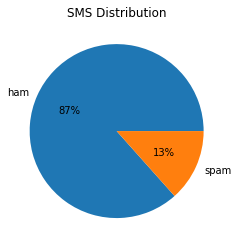

In [ ]:
n_sms = pd.value_counts(df["is_spam"], sort=True)
n_sms.plot(kind="pie", labels=["ham", "spam"], autopct="%1.0f%%")

plt.title("SMS Distribution")
plt.ylabel("")
plt.show()

In [ ]:
from collections import Counter

df1 = pd.DataFrame.from_dict(
    Counter(" ".join(df[df['is_spam'] == 0]["content"]).split()).most_common(20)
)
df1 = df1.rename(columns={0: "word_in_ham", 1 : "frequency"})
                 
df2 = pd.DataFrame.from_dict(
    Counter(" ".join(df[df['is_spam'] == 1]["content"]).split()).most_common(20)
)
df2 = df2.rename(columns={0: "word_in_spam", 1 : "frequency"})

In [ ]:
df["is_spam"].replace({"ham": 0, "spam": 1}, inplace=True)

df.head(n=10)

TypeError: ignored

In [ ]:
df1.plot.bar(legend=False)
plt.xticks(np.arange(len(df1["word_in_ham"])), df1["word_in_ham"])
plt.title("Word Frequency in Ham SMS.")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df2.plot.bar(legend=False, color="orange")
plt.xticks(np.arange(len(df2["word_in_spam"])), df2["word_in_spam"])
plt.title("Word Frequency in Spam SMS.")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


In [ ]:
_, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(
    df.loc[df.is_spam == 0, "message_len"],
    shade=True,
    label="Ham",
    clip=(-50, 250),
)
sns.kdeplot(df.loc[df.is_spam == 1, "message_len"], shade=True, label="Spam")
ax.set(
    xlabel="Length",
    ylabel="Density",
    title="Length of SMS.",
)
ax.legend(loc="upper right")
plt.show()

In [ ]:
_, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(
    df.loc[df.is_spam == 0, "nwords"],
    shade=True,
    label="Ham",
    clip=(-10, 50),
)
sns.kdeplot(df.loc[df.is_spam == 1, "nwords"], shade=True, label="Spam")
ax.set(
    xlabel="Words",
    ylabel="Density",
    title="Number of Words in SMS.",
)
ax.legend(loc="upper right")

In [ ]:
_, ax = plt.subplots(figsize=(10, 4))
sns.kdeplot(
    df.loc[df.is_spam == 0, "nupperwords"],
    shade=True,
    label="Ham",
    clip=(0, 35),
)
sns.kdeplot(df.loc[df.is_spam == 1, "nupperwords"], shade=True, label="Spam")
ax.set(
    xlabel="Uppercased Words",
    ylabel="Density",
    title="Number of Uppercased Words.",
)
ax.legend(loc="upper right")
plt.show()

In [ ]:
_, ax = plt.subplots(figsize=(10, 5))
ax = sns.scatterplot(x="message_len", y="nupperchars", hue="is_spam", data=df)
ax.set(
    xlabel="Characters",
    ylabel="Uppercase Characters",
    title="Number of Uppercased Characters in SMS.",
)
ax.legend(loc="upper right")
plt.show()

In [ ]:
_, ax = plt.subplots(figsize=(10, 4))
grouped_data = (
    df.groupby("is_spam")["is_free_or_win"]
    .value_counts(normalize=True)
    .rename("Percentage of Group")
    .reset_index()
)
print(grouped_data)

sns.barplot(
    x="is_spam",
    y="Percentage of Group",
    hue="is_free_or_win",
    data=grouped_data,
)
plt.show()

In [ ]:
_, ax = plt.subplots(figsize=(10, 4))
grouped_data = (
    df.groupby("is_spam")["is_url"]
    .value_counts(normalize=True)
    .rename("Percentage of Group")
    .reset_index()
)
print(grouped_data)

sns.barplot(
    x="is_spam",
    y="Percentage of Group",
    hue="is_url",
    data=grouped_data,
)
plt.show()

# **Model Evaluation**
With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choice.

We'll be using scikit-learn here, choosing the Naive Bayes classifier to start with:

Encoding class labels in Target Variable (Not Mandatory)
Encoding the Target variable (here label as spam or ham) into numeric form is ideal before data is fed to Machine Learning algorithms. I am just escaping this now as Naive Bayes can work with categorial target variable.

In [ ]:
df["type"].replace({0: "ham", 1 : "spam"}, inplace=True)

In [ ]:
df.rename(columns={'is_spam': 'type', 'content': 'text'}, inplace=True)
df.head()

,type,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from sklearn.model_selection import train_test_split
text_train,text_test,type_train,type_test = train_test_split(df['text'],df['type'],test_size=0.2)

In [ ]:
text_train, text_test, type_train, type_test = \
train_test_split(text_tfidf, df['type'], test_size=0.2)

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [ ]:
print("train dataset features size : ",text_train.shape)
print("train dataset label size", type_train.shape)

print("\n")

print("test dataset features size", text_test.shape)
print("test dataset lable size", type_test.shape)


train dataset features size :  (4457, 11304)
train dataset label size (4457,)


test dataset features size (1115, 11304)
test dataset lable size (1115,)


The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). Note the default split would have been 30/70.

# **Building Naive Bayes classifier Model**
Let's create a Naive Bayes classifier Model using Scikit-learn.

In [ ]:
#Extract SPAM messages
spam_messages = df[df["type"]=="spam"]
spam_messages.head() #Display first 5 rows of SPAM messages

,type,text,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [ ]:
spam_messages.describe()

,length
count,747.000000
mean,138.866131
std,29.183082
min,13.000000
25%,132.500000
50%,149.000000
75%,157.000000
max,224.000000


In [ ]:
df.groupby('type').describe()

length                                                         
       count        mean        std   min    25%    50%    75%    max
type                                                                 
ham   4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam   747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

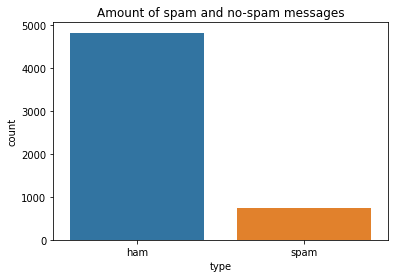

In [ ]:
sns.countplot(data = df, x= df["type"]).set_title("Amount of spam and no-spam messages")
plt.show()

In [ ]:
spam_df = df[df['type'] == 'spam'] #create sub-dataframe of spam text
ham_df = df[df['type'] == 'ham'] #sub-dataframe of ham text

In [ ]:
#sns.set()
#df.set_index('type').T.plot(kind='bar', stacked=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


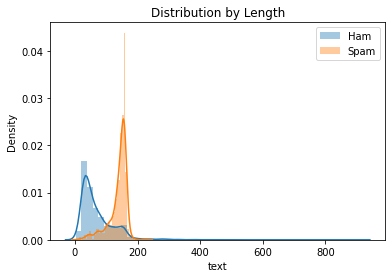

In [ ]:
ham =df[df['type'] == 'ham']['text'].str.len()
sns.distplot(ham, label='Ham')
spam = df[df['type'] == 'spam']['text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

plt.savefig('Distrbution of word by length.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


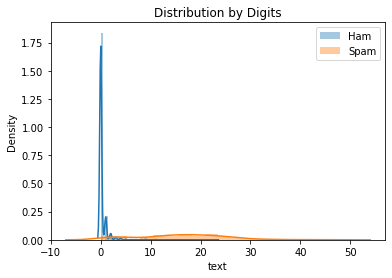

In [ ]:
#plotting graph by digits.

ham1 = df[df['type'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(ham1, label='Ham')
spam1 = df[df['type'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(spam1, label='Spam')
plt.title('Distribution by Digits')
plt.legend()
plt.savefig('Distrbution of word by Digits.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


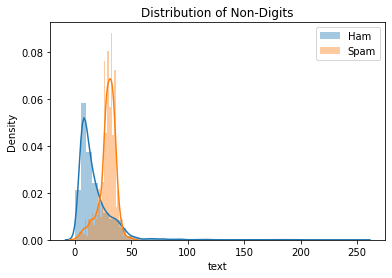

In [ ]:
#plotting graph for non-digits.

ham2 = df[df['type'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(ham2, label='Ham')
spam2 = df[df['type'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(spam2, label='Spam')
plt.title('Distribution of Non-Digits')
plt.legend()
plt.savefig('Distrbution of word by Non- Digits.png')

In [ ]:
#for counting frequently occurence of spam and ham.

count1 = Counter(" ".join(df[df['type']=='ham']["text"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(df[df['type']=='spam']["text"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

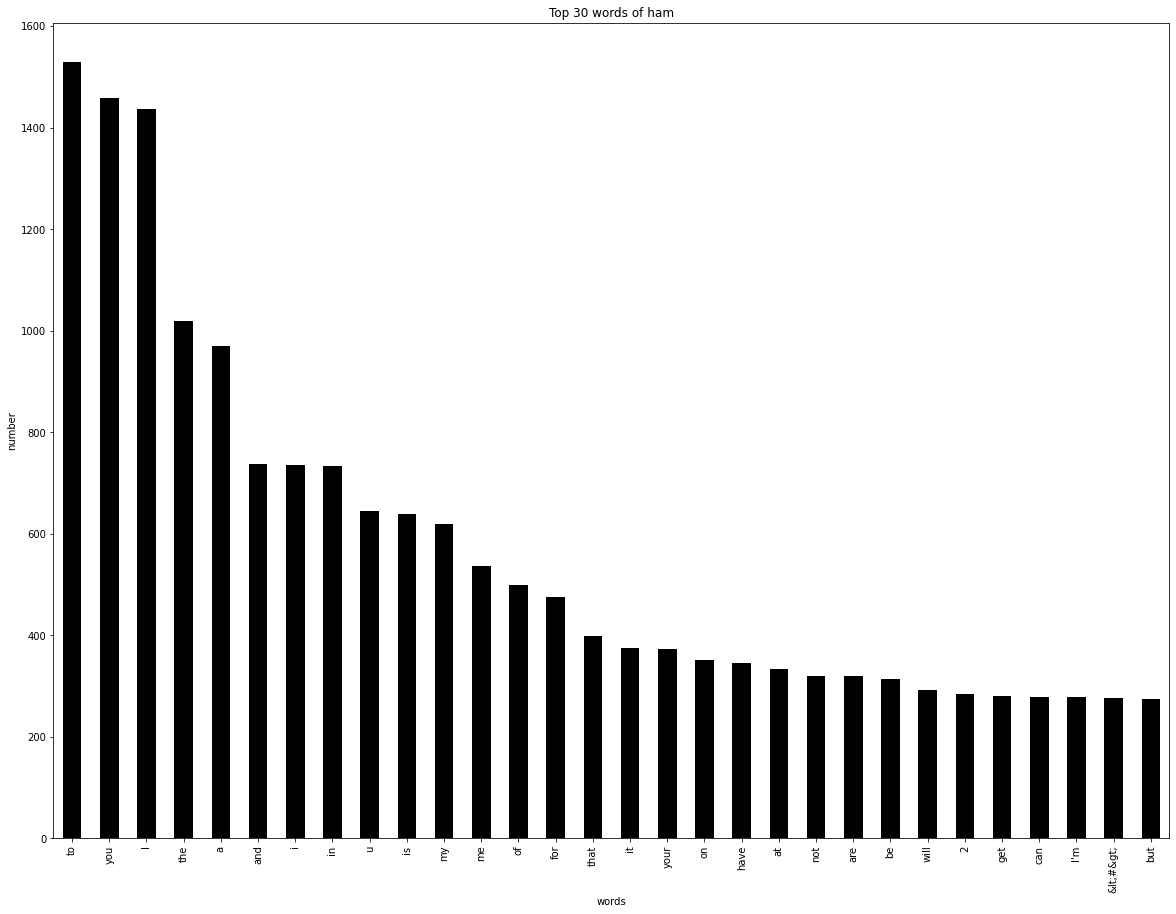

<Figure size 432x288 with 0 Axes>

In [ ]:
data1.plot.bar(legend = False, color = 'black',figsize = (20,15))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 words of ham')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

plt.savefig('Top30 words ham.png',dpi=199)

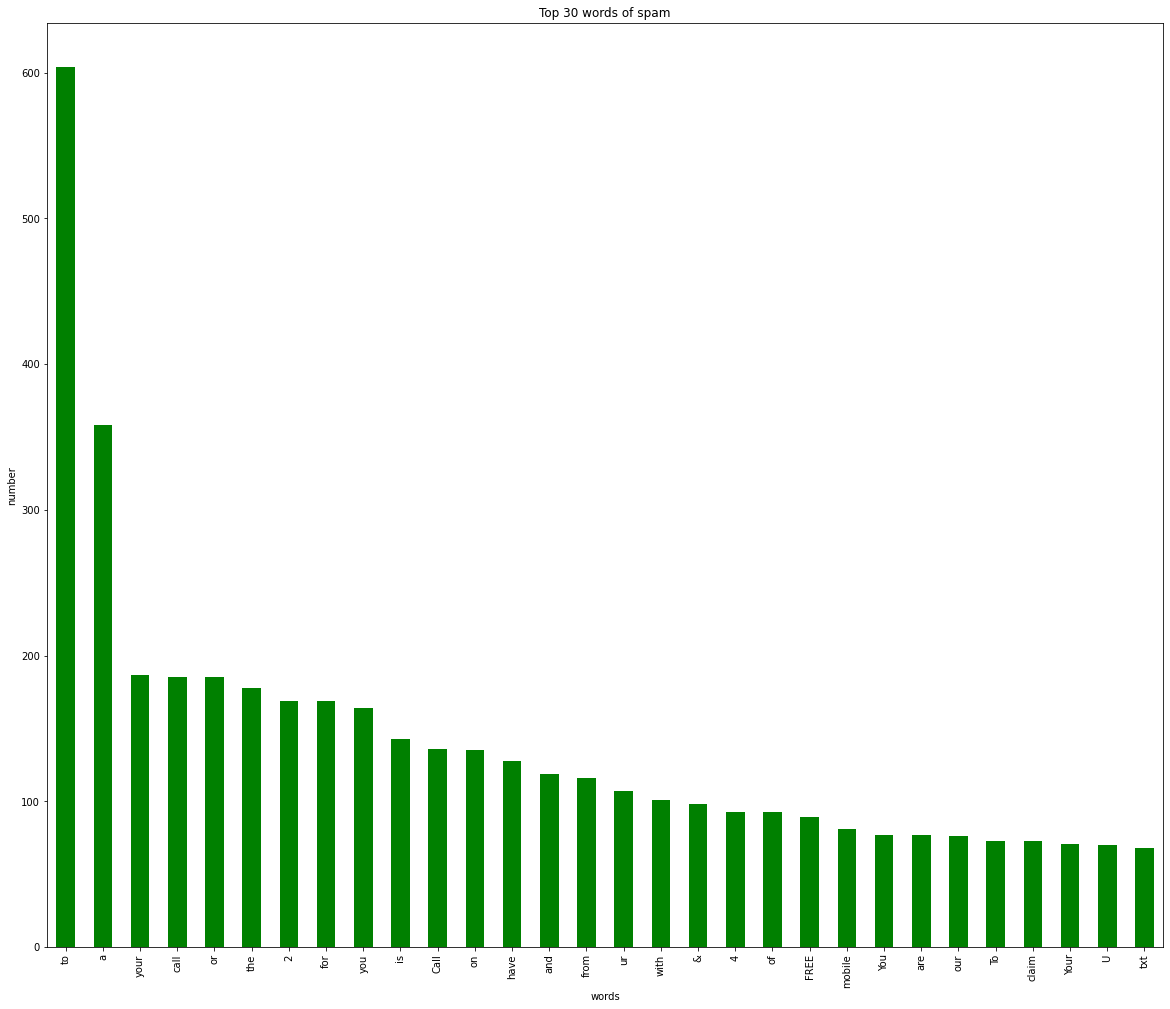

In [ ]:
data2.plot.bar(legend = False, color = 'green', figsize = (20,17))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 words of spam')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  3900
X_test:  1672
y_train:  3900
y_test:  1672


In [ ]:
corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [ ]:
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(max_features=1500)

In [ ]:
X_train_cv = cv.transform(X_train)
X_train_cv

<3900x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 42787 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_cv = cv.transform(X_test)
X_test_cv

<1672x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 18639 stored elements in Compressed Sparse Row format>

In [ ]:
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Pipelining 
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])
text_clf = text_clf.fit(X_train, y_train)
# using GridSearch CV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3),}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, y_train)
gs_clf.best_score_
gs_clf.best_params_
predicted_nb = gs_clf.predict(X_test)
print(predicted_nb)

['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']


In [ ]:
from sklearn.metrics import classification_report
target_names = ['text', 'type']

In [ ]:
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  0.9826555023923444
Naive Bayes confusion_matrix:  [[1425   15]
 [  14  218]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
spam_detect_model = clf.fit(X_train_cv, y_train)

In [ ]:
print(classification_report(y_test, y_mnb))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1439
        spam       0.94      0.94      0.94       233

    accuracy                           0.98      1672
   macro avg       0.96      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



# **SVM Classification**

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)

In [ ]:
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))

SVM Accuracy:  0.8343301435406698
SVM confusion_matrix:  [[1303  141]
 [ 136   92]]


In [ ]:
print(classification_report(y_test, y_svc))

              precision    recall  f1-score   support

         ham       0.90      0.91      0.90      1439
        spam       0.40      0.39      0.40       233

    accuracy                           0.83      1672
   macro avg       0.65      0.65      0.65      1672
weighted avg       0.83      0.83      0.83      1672



# **KNeighbors Classification**

In [ ]:
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train_cv,y_train)

y_knc = knc.predict(X_test_cv)

In [ ]:
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))
print('KNeighbors confusion_matrix: ', confusion_matrix(y_test, y_knc)) 

KNeighbors Accuracy_score:  0.8606459330143541
KNeighbors confusion_matrix:  [[1439    0]
 [ 233    0]]


In [ ]:
print(classification_report(y_test, y_knc))

              precision    recall  f1-score   support

         ham       0.86      1.00      0.93      1439
        spam       0.00      0.00      0.00       233

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.74      0.86      0.80      1672



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, neg_label=0, pos_label=1, classes=[0,1])
y_test_bin = np.hstack((1 - y_test_bin, y_test_bin))
print(y_test_bin)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


# **Decision Tree Classification**

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [ ]:
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test)) 

Decision Tree Accuracy:  0.9730861244019139
Decision Tree confusion_matrix:  [[1421   27]
 [  18  206]]


In [ ]:
print(classification_report(y_test, y_dtc))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1439
        spam       0.92      0.88      0.90       233

    accuracy                           0.97      1672
   macro avg       0.95      0.94      0.94      1672
weighted avg       0.97      0.97      0.97      1672



# **Extra Tree Classification**

In [ ]:
etc = ExtraTreesClassifier(n_estimators=37, random_state=252)
etc.fit(X_train_cv,y_train)
y_etc = etc.predict(X_test_cv)

In [ ]:
print('Extra Tree Accuracy_score: ',accuracy_score(y_test,y_etc))
print('Extra Tree confusion_matrix: ', confusion_matrix(y_etc, y_test))



Extra Tree Accuracy_score:  0.9820574162679426
Extra Tree confusion_matrix:  [[1434   25]
 [   5  208]]


In [ ]:
print(classification_report(y_test, y_etc))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1439
        spam       0.98      0.89      0.93       233

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



# **Random Forest Classification**

In [ ]:
rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)

In [ ]:
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test))

Random Forest Accuracy_score:  0.9796650717703349
Random Forest confusion_matrix:  [[1437   32]
 [   2  201]]


In [ ]:
print(classification_report(y_test, y_rfc))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1439
        spam       0.99      0.86      0.92       233

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



# **Adaptive Boosting Classification**

In [ ]:
abc = AdaBoostClassifier(n_estimators=37, random_state=252)
abc.fit(X_train_cv,y_train)
y_abc = abc.predict(X_test_cv)

In [ ]:
print('AdaBoost Accuracy_score: ',accuracy_score(y_test,y_abc))
print('AdaBoost confusion_matrix: ', confusion_matrix(y_abc, y_test)) 

AdaBoost Accuracy_score:  0.965311004784689
AdaBoost confusion_matrix:  [[1417   36]
 [  22  197]]


In [ ]:
print(classification_report(y_test, y_abc))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1439
        spam       0.90      0.85      0.87       233

    accuracy                           0.97      1672
   macro avg       0.94      0.92      0.93      1672
weighted avg       0.96      0.97      0.96      1672



# **Bagging Classification**

In [ ]:
bc = BaggingClassifier(n_estimators=9, random_state=252)
bc.fit(X_train_cv,y_train)
y_bc = bc.predict(X_test_cv)

In [ ]:
print('Bagging Accuracy_score: ',accuracy_score(y_test,y_bc))
print('Bagging confusion_matrix: ', confusion_matrix(y_bc, y_test)) 

Bagging Accuracy_score:  0.972488038277512
Bagging confusion_matrix:  [[1420   27]
 [  19  206]]


In [ ]:
print(classification_report(y_test, y_bc))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1439
        spam       0.92      0.88      0.90       233

    accuracy                           0.97      1672
   macro avg       0.95      0.94      0.94      1672
weighted avg       0.97      0.97      0.97      1672

